# Controller Tuning
Finding constants

For info, see here: https://docs.google.com/document/d/1e9rO8AiSlSfKWVc_sojiy2BG749beE5V_XPPUCHijM0/edit?usp=sharing

In [34]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import control
import cmath

In [166]:
L = 0.015266817305695372     # Inductance
C = -0.000004                # Lumped parameter - currently trying to find a way to properly tune this
R = 2.41                     # Coil Resistance [ohms]

# Linearization point - feel free to change thsese as well
# Computing linearization point (find mass to use given a current and position setpoint)
I_bar = 1.5 # TODO: compute ideal value of I_bar that perfectly offsets y_bar based on model
y_bar = 0.03

#(-C * I_bar) / (9.81 * L * 2 * math.pi * y_bar**2) # Computes mass necessary for linearization point
m = 3.0e-3 # Default mass - feel free to change
# m = 6.0e-3

In [167]:
a2 = (-C * I_bar) / (m * L * 2 * np.pi * y_bar**3)
np.sqrt(a2) # pole locations of second plant (+/-)

27.788744601393653

In [168]:
a1 = (-C * I_bar) / (m * 4 * np.pi * y_bar**2)

In [169]:
- R / L # pole locations of first plant

-157.85870438764837

$$ G_c = \frac{1}{R+Ls}$$
$$ G_e = \frac{a_1}{s^2+a_2} $$
$$ G = \frac{a_1}{Ls^3+Rs^2+La_2s+Ra_2}$$

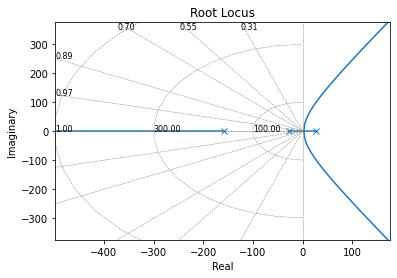

In [170]:
lti_uncontrolled = control.TransferFunction([a1], [L, R, -L*a2, -R*a2])
rlist, klist = control.root_locus(lti_uncontrolled)
plt.show()

$$ G = \frac{a_1}{Ls^3+Rs^2+La_2s+Ra_2}$$
$$ C = K_P + \frac{K_I}{s} + K_Ds $$ 
$$ C = \frac{K_Ds^2 + K_Ps + K_I}{s} $$

$$ GC = \frac{a_1 K_D s^2 + a_1 K_P s + a_1 K_I}{Ls^4+Rs^3+La_2s^2+Ra_2s}$$

#### Controller Considerations


Asymptotes at 
$$ q = \#\text{poles} - \#\text{zeros}$$ 
$$ q > 0 $$ 
$$\sigma = \frac{\sum{p_i} -\sum{z_i}}{q}$$


##### Contributing Factors for Asymptote

$$q = 4-2 = 2 $$

$$p_1 = \frac{-R}{L} = -157$$
$$p_2, p_3 = \sqrt{a_2} = \sqrt{\frac{CI_{bar}}{mL2\pi Y_{bar}^3}} = \pm 27 \text{  Don't contribute}$$
$$p_4 = 0$$

$$z_1, z_2 = \frac{-K_P \pm \sqrt{K_p^2 -4K_{I}K_{D}}}{2K_D} \text{ Imaginary portions cancel, important portion is KP/2KD} $$


Asymptote is at $$\frac{ \frac{-R}{L} - 2\frac{-K_P}{2K_D}}{q} = \frac{\frac{-R}{L} - \frac{-K_P}{K_D}}{2}$$

In [176]:
k = 1
kp = k*180
ki = k*1600
kd = k*2.5

asymptote = ((-R/L)-(-kp/kd))/2
print(asymptote)

if 4*kd*ki < kp**2:
    print("Check complexity of poles, -kp, +kd or +ki")

# if kp/(2*kd) < np.sqrt(np.abs(kp**2 - 4*kd*ki))/(2*kd):
#     print("Check proportionality, +kp, -kd")    

if asymptote > 0:
    print("Asymptote is in RHP, -kp or +kd")

-42.92935219382419
Check complexity of poles, -kp, +kd or +ki


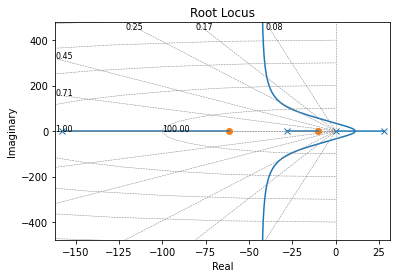

In [172]:
lti_uncontrolled = control.TransferFunction([a1*kd, a1*kp, a1*ki], [L, R, -L*a2, -R*a2,0])
rlist, klist = control.root_locus(lti_uncontrolled)
plt.show()

Interesting pole-zero combos
180, 1600, 2.5 -> two complex zeros
180, 1600, 2.5 -> two complex zeros, dominating is non-ossilatory

#### ToDo: What does the bode plot look like and what is the scaling needed?